## Projeto 1 — Otimização de Modelos de Diagnóstico

### Introdução


Este notebook estabelece o ponto de partida para o Projeto 1, cujo objetivo é
otimizar modelos de diagnóstico de diabetes por meio de algoritmos genéticos.

Nesta etapa:
- Definimos o modelo baseline;
- Analisamos seu desempenho inicial;
- Identificamos os hiperparâmetros relevantes;
- Justificamos as métricas utilizadas como função fitness.

As decisões aqui documentadas fundamentam a implementação do algoritmo genético
nos notebooks seguintes.

### Carregamento das bibliotecas e dataset

O dataset utilizado nesta fase já passou pelas etapas de pré-processamento
(imputação, normalização e balanceamento lógico), conforme documentado na Fase 1.

O uso de um dataset processado garante reprodutibilidade e separação clara
entre preparação dos dados e modelagem.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

dataset = pd.read_csv("B:/Pós/hospital-ai-diagnosis/dados/processados/processado_diabetes.csv")

X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

### Divisão Treino/Teste
A divisão dos dados mantém a proporção das classes por meio de estratificação,
assegurando que o conjunto de teste represente adequadamente o problema original.


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### Modelo Baseline — Regressão Logística

**Logistic Regression** foi escolhida como modelo final devido ao maior *recall* (0.70) para a classe de pacientes diabéticos, garantindo melhor detecção de casos positivos — o que é fundamental em contextos médicos, onde falsos negativos podem representar risco à saúde do paciente.  


O foco desta fase não é substituir o modelo, mas **otimizar sua configuração**.

In [8]:
baseline_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)

### Avaliação do Baseline
Como o problema envolve diagnóstico médico, métricas sensíveis à classe positiva
(diabetes) são priorizadas, especialmente o recall.

As métricas utilizadas são:
- Accuracy
- Recall
- F1-score

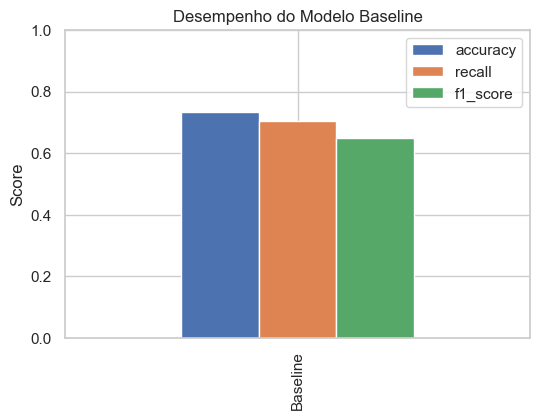

{'accuracy': 0.7337662337662337,
 'recall': 0.7037037037037037,
 'f1_score': 0.6495726495726496}

In [10]:
metrics_df = pd.DataFrame(
    baseline_metrics, index=["Baseline"]
)

metrics_df.plot(kind="bar", figsize=(6,4))
plt.title("Desempenho do Modelo Baseline")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

baseline_metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred)
}

baseline_metrics

## Hiperparâmetros da Regressão Logística
A Regressão Logística possui diversos hiperparâmetros de acordo com a [documentação oficial do scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Para fins de otimização
com Algoritmos Genéticos, é necessário selecionar apenas aqueles que impactam
diretamente o desempenho do modelo.

### Parâmetros Selecionados
|Parâmetro|Tipo|Motivo|
|---|---|---|
|C|Contínuo|Controla a força da regularização|
|penalty|Categórico|Define o tipo de regularização|
|solver|Categórico|Afeta convergência e estabilidade|
|max_iter|Discreto|Controla o processo de otimização|

O hiperparâmetro `solver` será fixado para garantir compatibilidade
com os demais parâmetros e reduzir o espaço de busca.

**Observação:** algumas combinações de `solver` e `penalty` não são válidas no scikit-learn.
Essas restrições serão tratadas na etapa de avaliação da fitness.

### Conclusão
Este notebook estabeleceu o baseline do problema, definiu métricas de avaliação
e justificou a escolha dos hiperparâmetros que serão otimizados.

No próximo notebook, será implementado o Algoritmo Genético, responsável por
explorar o espaço de hiperparâmetros definido e buscar configurações que
maximizem o desempenho do modelo.